## Задача 1

### 1.1. Скачать данные по ссылке 

In [32]:
import pandas as pd
df = pd.read_csv('D:\IT-технологии\Курс Основы Python для аналитиков\kc-house-data.csv', sep =',')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2 Изучите стоимости недвижимости


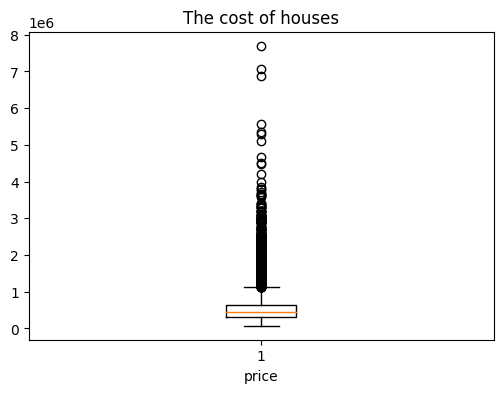

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot(df['price'])
plt.xlabel('price')
plt.ylabel('')
plt.title('The cost of houses');

Стоимость половины недвижимости  не более 500000. В основном ценовой разброс в пределах 1000000 . Есть и выбросы в  данных, по которым видно, что в зависимости от определенных условий, стоимость недвижимости увеличивается от 10 и более  раз.   

### 1.3 Изучите распределение квадратуры жилой

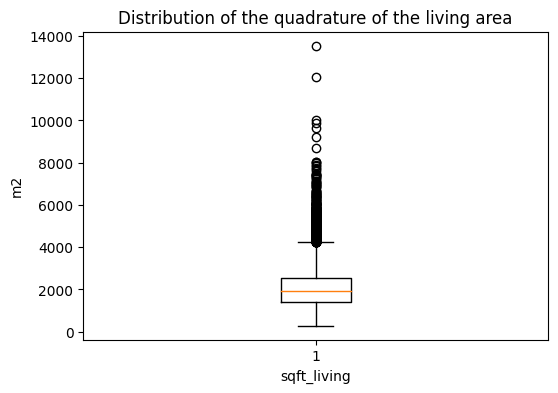

In [23]:
plt.figure(figsize=(6,4))
plt.boxplot(df['sqft_living'])
plt.xlabel('sqft_living')
plt.ylabel('m2')
plt.title('Distribution of the quadrature of the living area');

Видим, что половина объектов недвижимости с жилой площади в пределах 2000 кв.м, но и 75 % объектов - не превышает 4000 кв.м.Есть и выбросы в  данных, по которым видно, что есть  недвижимость с жилой площадью от 4000 кв.м до 14000 кв.м.   

### 1.4 Изучите распределение года постройки

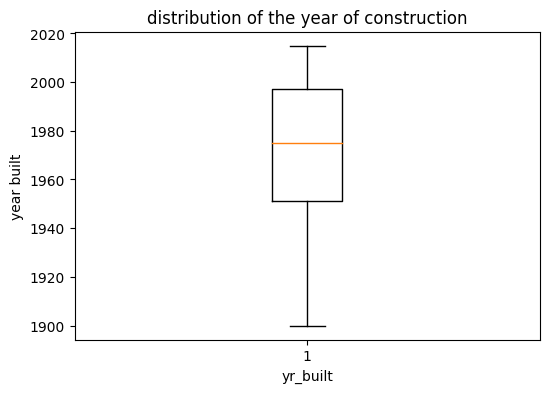

In [25]:
plt.figure(figsize=(6,4))
plt.boxplot(df['yr_built'])
plt.xlabel('yr_built')
plt.ylabel('year built')
plt.title('distribution of the year of construction');

Видим, что есть дома построенные и в 1900 году , и в 2018-2019 гг. Но в основном, время постройки домов в пределах 1950 - 2000 гг.,где 50 % - до 1979 года. 

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Cделайте выводы

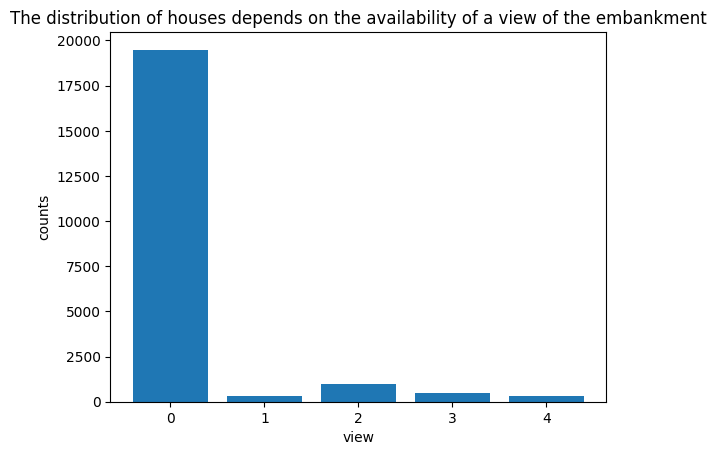

In [27]:
data = df['view'].value_counts()
name = data.index
values = data.values
plt.bar(x=name, height=values)
plt.xlabel('view')
plt.ylabel('counts')
plt.title('The distribution of houses depends on the availability of a view of the embankment');

Видим, что спрос на дома с видом на набережную только увеличивается.

### 2.2 Изучите распределение этажей домов

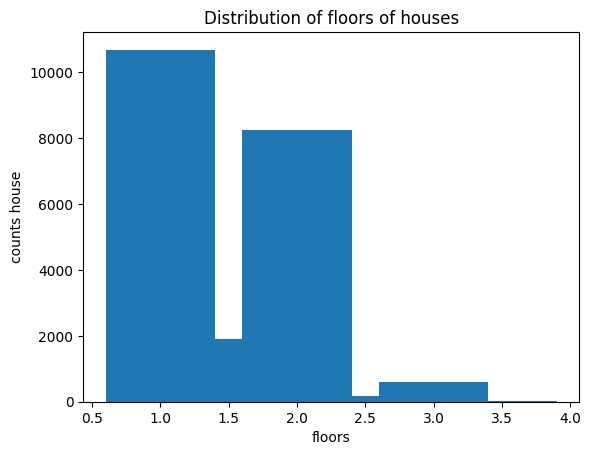

In [28]:
data = df['floors'].value_counts()
name = data.index
values = data.values
plt.bar(x=name, height=values)
plt.xlabel('floors')
plt.ylabel('counts house')
plt.title('Distribution of floors of houses');


В основном, строят одноэтажные и двухэтажные дома, причем количество одноэтажных домов всего на 10% больше двухэтажных.

### 2.3 Изучите распределение состояния домов

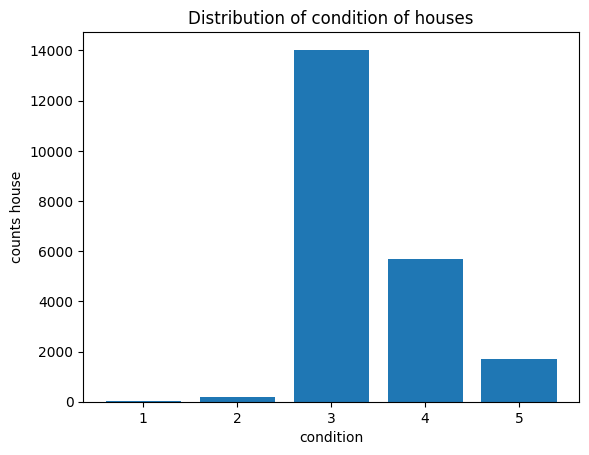

In [30]:
data = df['condition'].value_counts()
name = data.index
values = data.values
plt.bar(x=name, height=values)
plt.xlabel('condition')
plt.ylabel('counts house')
plt.title('Distribution of condition of houses');


Видим, что 63 % домов оценивается состояние как удовлетворительное. Около 2000 зданий в аварийном состоянии, еще 6000 зданий -требуется капитальный ремонт. 

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости

In [34]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] =0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


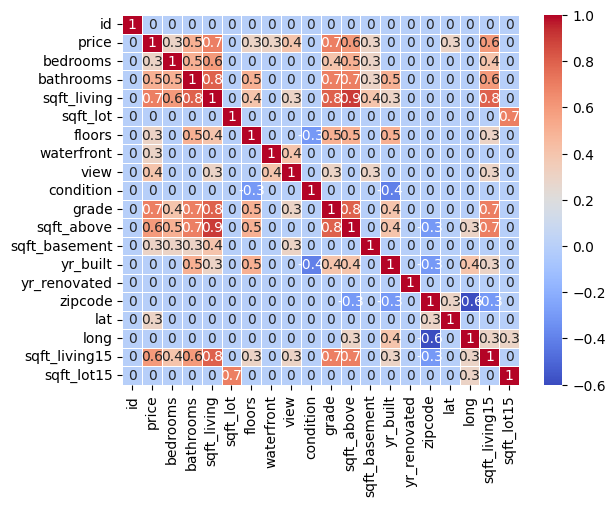

In [35]:
sns.heatmap(corr_matrix, annot =True, linewidths=0.5, cmap='coolwarm');

Существует много различных факторов, влияющих на цену домов(квартир). Одни из них лишь незначительно уменьшают либо увеличивают стоимость , а другие имеют существенное влияние.
 Если дом аварийный или старый, то стоимость жилья будет уменьшена, а если это  в 
новостройке, то и ее цена будет, соответственно, выше. Кроме того, существенное влияние окажет состояние дома. Чем чище и симпатичнее будет выглядеть здание, тем большую цену можно назначать . 
 Этаж тоже влияет на стоимость объекта недвижимости. 
Условное разделение этажей на: первый, последний и все остальные.Квартиры, расположенные на первом этаже обычно либо значительно дороже (зависит от расположения дома и от возможности использовать (перевести) помещение под коммерческие цели), либо процентов на 5-10 дешевле из-за:сырости и холода,близкого расположения мусорного бака, парковки и прочих "радостей" под окнами,шума с улицы и постоянно хлопающих дверей парадного,излишней темноты в комнатах из-за деревьев.
  Чем большей будет жилищная площадь, тем более высокую стоимость она будет иметь.
Вполне очевидно, что при оценке недвижимости этот показатель является объективным и неоспоримым, так как во многих случаях цена назначается за квадратный метр.
  Вид из окна.Этот показатель тоже немаловажен.